In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm, skew

In [3]:
train = pd.read_csv('data/house-prices/train.csv')
test = pd.read_csv('data/house-prices/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
## This time what ever you do on train set, please do the same on test set, to avoid rework at the end.
train_Id = train['Id']
test_Id = test['Id']

In [7]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [8]:
train.shape

(1460, 80)

In [9]:
test.shape

(1459, 79)

In [10]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Text(0, 0.5, 'LivingArea')

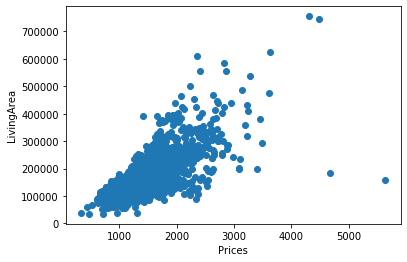

In [11]:
## removing outliers, the info about outliers came from documentation of the Ames dataset.
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
ax.set_xlabel('Prices')
ax.set_ylabel('LivingArea')

In [12]:
train = train.drop(train[(train['SalePrice']<=300000) & (train['GrLivArea'] >4000)].index)

Text(0, 0.5, 'LivingArea')

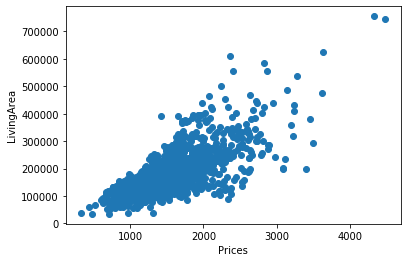

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
ax.set_xlabel('Prices')
ax.set_ylabel('LivingArea')

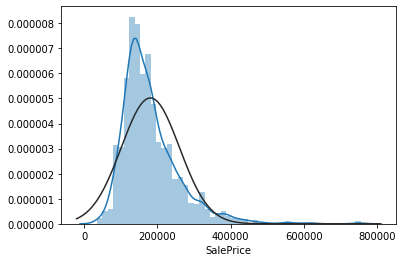

In [14]:
## It is a general practice to do analysis on your target practice and some some transformation
## to convert it to a normal dist, cause it becomes easy for linear model to approximate.
sns.distplot(train['SalePrice'],fit=norm)

In [15]:
mu , sigma = norm.fit(train['SalePrice'])
print('Mu - ',mu)
print('Sigma - ',sigma)

Mu -  180932.91906721535
Sigma -  79467.78892987774


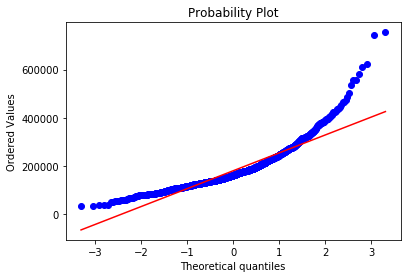

In [16]:
## qq plot for the same:
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

In [17]:
### Distribution is rightly skewed, so lets transform it.

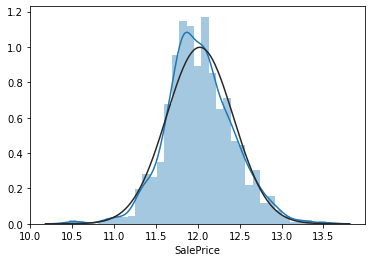

In [18]:
## Log transform the variable using numpy:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)

In [19]:
mu , sigma = norm.fit(train['SalePrice'])
print('Mu - ',mu)
print('Sigma - ',sigma)

Mu -  12.024015155682552
Sigma -  0.3995757283645756


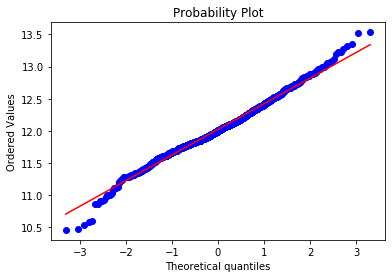

In [20]:
## qq plot after transformation:
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

## Feature Engineering:

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]

y = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [22]:
all_data = pd.concat([train,test]).reset_index(drop=True)

In [23]:
all_data.shape

(2917, 79)

In [24]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [25]:
all_data_na = all_data.isnull().sum() / len(all_data) * 100

In [26]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)#[:30]

In [27]:
all_data_na = all_data_na[:30]

In [28]:
missing_data = pd.DataFrame({'Missing_ratio':all_data_na})

In [29]:
missing_data.head(20)

,Missing_ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


## Day 6

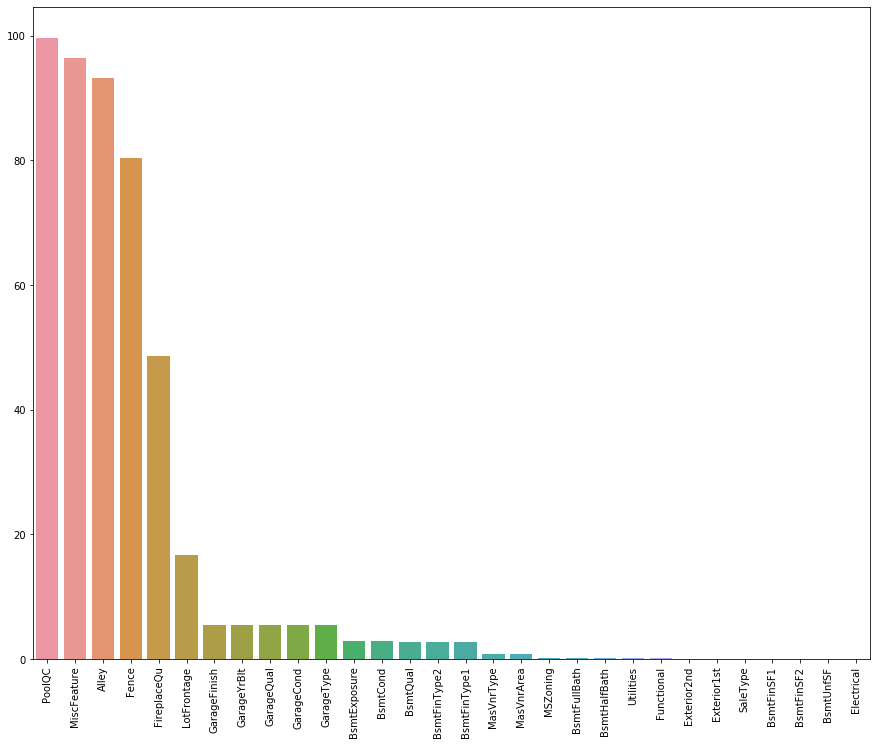

In [30]:
f,ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)

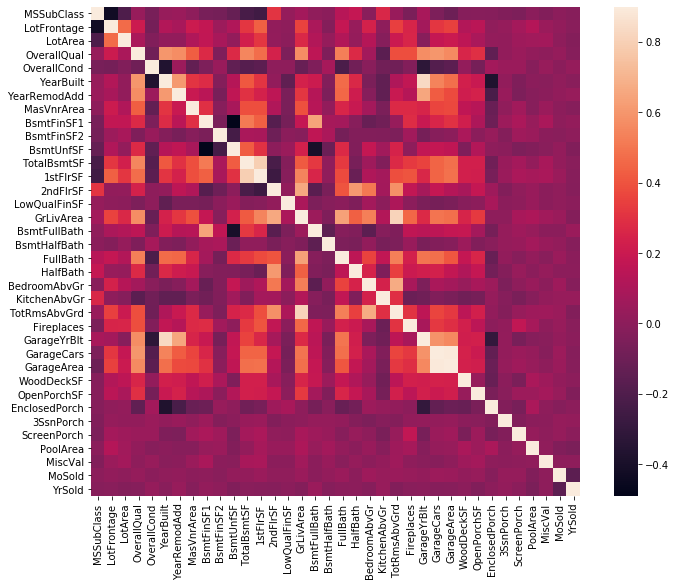

In [31]:
plt.subplots(figsize=(12,9))
corrmat = all_data.corr()
sns.heatmap(corrmat, vmax=0.9,square=True)

In [32]:
## Imputing missing values
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [33]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [34]:
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [35]:
all_data.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.5
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [36]:
## filling na values in lotfrontage with median values of lotfrontage from the neighborhood
#all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median))
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [37]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [38]:
## no garage equals to no cars in these garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [39]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [40]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [41]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [42]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])

In [43]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [44]:
all_data.drop('Utilities',axis=1,inplace=True)

In [45]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [46]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [47]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [48]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [49]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [50]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [51]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [52]:
## Okay so no missing values

In [53]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [54]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in cols:
    model = LabelEncoder()
    model.fit(list(all_data[i].values))
    all_data[i] = model.transform(list(all_data[i].values))

In [55]:
all_data['MoSold'].value_counts()

8     503
9     446
7     394
6     279
10    233
5     232
1     172
11    158
2     142
4     133
0     121
3     104
Name: MoSold, dtype: int64

In [56]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [57]:
## list of features which are not object. This might have created a problem if date etc features were there.
numerical_features = all_data.dtypes[all_data.dtypes != 'object'].index

In [58]:
numerical_features.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'TotalSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [59]:
skewed_feat = all_data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [60]:
skewness = pd.DataFrame({'skewness':skewed_feat})

In [61]:
skewed_feat.shape

(59,)

In [62]:
skewness.head()

,skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [63]:
## applying boxcox transformation on highly skewed features.
skewness = skewness[abs(skewness) > 0.75]
print("There are {} features which are highly skewed".format(skewness.shape[0]))

There are 59 features which are highly skewed


In [64]:
from scipy.special import boxcox1p

lam = 0.15
for i in skewness.index:
    all_data[i] = boxcox1p(all_data[i],lam)

In [65]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,...,0.0,1.540963,1.820334,None,0.0,1.820334,1.194318,WD,Normal,14.976591
1,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,...,0.0,1.540963,1.820334,None,0.0,2.440268,0.730463,WD,Normal,14.923100
2,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.0,...,0.0,1.540963,1.820334,None,0.0,3.011340,1.194318,WD,Normal,15.149678
3,3.011340,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.0,...,0.0,1.540963,1.820334,None,0.0,1.820334,0.000000,WD,Abnorml,14.857121
4,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.0,...,0.0,1.540963,1.820334,None,0.0,1.540963,1.194318,WD,Normal,15.852312


In [66]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [67]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [68]:
#!pip install pandas==1.0.3

## Modelling:

In [69]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [70]:
import xgboost as xgb
import lightgbm as lgb

In [84]:
## creating a function for shuffle with cross validation.
n_folds = 5

def rmse_shuffle(model):
    cv=KFold(n_folds, shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=cross_val_score(model,train.values,y,cv=cv,scoring='neg_mean_squared_error')
    print(rmse)
    rmse = np.sqrt(-rmse)
    return(rmse)

In [72]:
## using a lasso regression model, making a pipeline with robust scaling
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005,random_state=1))

In [73]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [74]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [75]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [76]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [77]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [85]:
score = rmse_shuffle(lasso)
print("\nLasso score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))

[-0.01079841 -0.01313716 -0.01542908 -0.01108763 -0.01202799]

Lasso score is as follows 0.1115 (0.0074)



In [87]:
score = rmse_shuffle(ENet)
print("\nElastic net score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))

[-0.01076596 -0.0131735  -0.01542686 -0.01107555 -0.01206196]

Elastic net score is as follows 0.1116 (0.0074)



In [89]:
score = rmse_shuffle(KRR)
print("\nKernel ridge score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))

[-0.01134912 -0.01448097 -0.01621471 -0.01214644 -0.01251183]

Kernel ridge score is as follows 0.1153 (0.0075)



In [90]:
score = rmse_shuffle(GBoost)
print("\nGboost score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))
score = rmse_shuffle(model_xgb)
print("\nXGboost score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))
score = rmse_shuffle(model_lgb)
print("\nLightGb score is as follows {:.4F} ({:.4F})\n".format(score.mean(),score.std()))

[-0.01173867 -0.016084   -0.01603568 -0.01184803 -0.01277017]

Gboost score is as follows 0.1167 (0.0083)

[20:25:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:26:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:26:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used 

In [91]:
## Read about all these regression models, theory and implementation too.

In [92]:
## You can further apply stacking to improve the scores